In [1]:
import pandas as pd
import numpy as np
import itertools
import math
from matplotlib import pyplot as plt

# Notes

## 1.2 Sample Spaces

Sample space: Set of all possible outcomes of the experiment

Sample spaces can be finite, contably infitite, or uncountably infinite.
- A set is "finite" if it can be placed in 1-1 correspondence with the set of natural numbers $<n$ for some $n$. More generally, it is sufficient to place it in 1-1 correspondence with some set of integers which is bounded both above and below.
- A set is "countable" if it can be placed in 1-1 correspondence with some subset of the natural numbers. Note that this includes finite sets, but also some infinite sets. Since the sets of all rationals is in 1-1 correspondence with the set of naturals, it is sufficient to place a set in 1-1 correspondence with some set of rationals to show that it is countable.
- A set is "infinite" if it is not finite. Since any finite set of real numbers is bounded, to prove a set is infinite, it is sufficient to put it in 1-1 correspondence with any unbounded set of real numbers.
- A set is "countably infinite" or "denumerable", if it is both countable and infinite. From the above remarks, it follows that to prove denumerability, it is sufficient to put a set in 1-1 correspondence with some unbounded set of rational numbers.
- A set is "uncountable" if it is not countable. Since all finite sets are countable, uncountable sets are all infinite. Per Cantor's theorem, the real numbers are uncountable. Further, since any interval can be put in 1-1 correspondence with the entire set of real numbers, to show a set is uncountable, it is sufficient to put it in 1-1 correspondence with some interval. 

[Source: Math Stackexchange](https://math.stackexchange.com/questions/1560332/countably-infinite-uncountable-or-finite)

**De Morgan's laws**

$(A\cup B)^c = A^c \cap B^c$ and $(A \cap B)^c = A^c \cup B^c$

**Example**

A coin is flipped 10 times. Writing Heads as H and Tails as T, a possible outcome (pebble) is HHHTHHTTHT, and the sample space is the set of all possible strings of length 10 of H's and T's. We can (and will) encode H as 1 and T as 0, so that an outcome is a sequence $(s_1,…, s_{10})$ with $s_j \in {0,1}$, and the sample space is the set of all such sequences. Now let's look at some events:

1. Let $A_1$ bee the event that the first flip is H. As a set:

$A_1 = \{(1,s_2,...,s_10): s_j \in \{0,1\}$ for $2 \leq j \leq 10\}$

2. Let $B$ be the event that at leas one flip was H. As a set:

$B = \bigcup_{j=1}^{10}A_j$

3. Let $C$ be the event that all the flips were H. As a set:

$C=\bigcap_{j=1}^{10}A_j$

4. Let $D$ be the event that there were at least two consecutive H. As a set:

$D = \bigcup_{j=1}^{9}(A_j \cup A_{j+1})$


## 1.3 Naive definition of probability

Definition:

$P_n = \frac{|A|}{|S|}$ 

Problems where definition is applicable:
- where there is symetry in the problem that makes the outcome equaly likely, for example: coin toss
- when the outcomes are equaly likely by design, for example: survey of $n$ people in a population of $N$ people
- when the naive definition serves as a useful null model. We assume the naive definition applies and compare the answers it provides to observed data.

## 1.4 Counting

### Multiplication rule

Consider a compound experiment consisting of two sub-experiments: $A$ and $B$. Experiment $A$ has $a$ possible outcomes, and for each of those outcomes experiment $B$ has $b$ possible outcomes. The compound experiment has $ab$ possible outcomes.

**Example**

We buy icecream and there are wafffle, and cake cones, and chocolate, vanilla, and strawberry flavours.

1. Total number of options: $2 \cdot 3 = 3 \cdot 2 = 6$
2. If we buy two icecreams on a certain day, one in the afternoon and one in the evening, then the number of possibilities is: $6^2=36$
3. If you are only interested in the number of icecreams you had in the day, not the order then we have: $6 \cdot 5 = 30$ ordered possibilities excluding repeated flavours like (Cake-Vanilla, Cake-Vanilla). This becomes $\frac{30}{2} = 15$ unordered possibilities because (Cake-Vanilla, Waffle-Vanilla) is equivalent to (Waffle-Vanilla, Cake-Vanilla) plus 6 repeated flavours: $15 + 6 = 21$.

Note that the 36 ordered pairs are equally likely but the 21 combinations are not.

From the multiplication rule, we can conclude that a set with $n$ elements has $2^n$ subsets. For example, the set $\{a,b,c\}$ has eight subsets including the set itself and the empty set:

$\emptyset, \{a\}, \{b\}, \{c\}, \{a,b\}, \{a,c\}, \{b,c\}, \{a,b,c\}$

### Sampling with replacement

If we have $n$ objects and making $k$ choices from them, one at a time with replacement, then there are $n^k$ possible outcomes. Each sample object is a sub-experiment and there are $k$ sub-experiments. So there are $n^k$ ways to obtain a sample of size $k$.

### Sampling without replacement

If we have $n$ objects and making $k$ choices from them, one at a time without replacemen, then there are $n(n-1)...(n-k+1)$ possible outcomes for $k\leq n$ and $0$ possiblities for $k \gt n$. Each sampled object is a sub-experiment, and the number of possible outcomes decreases by one each time.

### Petmutations and factorials

A permutation of $1,2,...,n$ is an arrangmenet of them in some order. By the theorem of sampling without replacement with $k=n$, there are $n!$ permutations of $1,2,...,n$

**Example**

There are $k$ people in a room. Assume each person's birthday is equaly likely to be any of the 365 days of the year (excluding February 29), and that people's birthdays are independent (assume there are no twins in the room). What is the probability that two or more people in the group have the same birthday?

There are $365^k$ possible ways of assigning birthdays. To calculate the probability of two or more people in the group having the same birthday we would have to divide all the possibilities that any two or more people share a birthday by the total number of possibilities. 

We can solve it by counting the compliment: the number of ways to assign birthdays to $k$ people such that no two people share a birthday. This is equivalent to sampling the 365 days of the year without replacement. If one person already has it, then no one else can have it.

So the probability that no two people will share a birthday is:

$P(b^c) = \frac{365 \cdot 364 \cdot 363 \cdot ... \cdot (365-k+1)}{356^k}$ for $k\leq365$

Which means that the probability of at least two people having the same birthday is:

$P(b) = 1-P(b^c)$

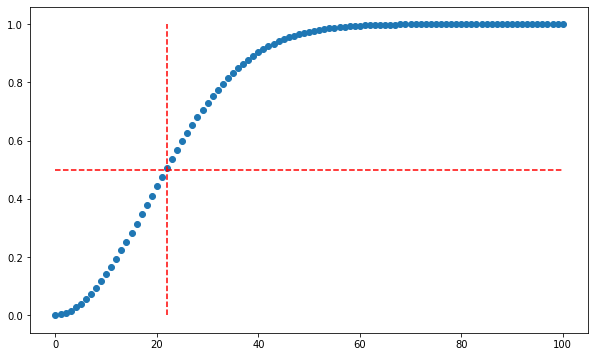

In [164]:
# Plot the probability of at least two people sharing a birthday as a function of k
k = np.arange(0,101,1,dtype=np.float64)
yp = (365-k)/365
y = 1-np.array([np.prod(yp[:i+1]) for i in k.astype(int)])

plt.figure(figsize=(10,6))
plt.scatter(k,y)
plt.hlines(y=0.5,xmin=0,xmax=100,color='red',ls='--')
plt.vlines(x=np.where(y>0.5)[0][0],ymin=0,ymax=1,color='red',ls='--')

### Adjusting for overcounting

To adjust for overcounting, we need to identify the source of the duplications and then divide by the nubmer of combinations

**Binomial Coefficient**

A *binomial coefficient* coutns the number of subsets of a certain size for a set, such as the number of ways to chose a comittee of size $k$ from a set of $n$ people. Sets and subsets are by definition unordered.

For any nonnegative integers $k$ and $n$, the binomial coefficient $n \choose k$ is the number of subsets of size $k$ for a set of size $n$. This is also called a combination.

For example, ${4 \choose 2}=6$

For $k \leq n$, we have:

$${n \choose k} = \frac{n(n-1)...(n-k+1)}{k!} = \frac{n!}{(n-k)!k!}$$

For $k\gt n$, we have ${n\choose k}=0$

**Example**

How many permutation of the word 'statistics' are there?

In [17]:
# Unique permutations
n = len('statistics')
print(f'Permutations = {math.factorial(n)}')

Permutations = 3628800


This would not be valid as we can replace the first letter for the sixth letter, both being 's' and nothing would change, which would mean this is **not** a new permutation. To adjust for this we need to divide the permutations by the repeated letters to eliminate the double counting.

In [25]:
# Adjust for double counting
p = math.factorial(n)/(math.factorial(3)*math.factorial(3)*math.factorial(2))
print(f'Permutations = {p}')

Permutations = 50400.0


To adjust we divide the total permutations $10!$ by the total number of Ss $3!$, Ts $3!$, and Is $2!$ = $\frac{10!}{3!3!2!}$

**Binomial Theorem**

$$(x+y)^n = \sum_{k=0}^n {n \choose k} x^ky^{n-k}$$

For example:

$(a+b)^4 = {4 \choose 0}a^0b^4 + {4 \choose 1}a^1b^3 + {4 \choose 2}a^2b^2 + {4 \choose 3}a^3b^1 + {4 \choose 4}a^4b^0$

In [5]:
n = 4
for k in range(n+1):
    print(math.factorial(n)/(math.factorial(k)*math.factorial(n-k)))

1.0
4.0
6.0
4.0
1.0


**Example**

A 5-card hand is dealt from a standard, well-shuffled 52-card deck. The hand is called a full house in poker if it consists of three cards of some rank and two cards of another rank, e.g., three 7's and two 10's (in any order). What is the probability of a full house?

There are ${52 \choose 5}$ total possible hands. Out of which $x$ number would be composed of 3 cards of some rank and 2 of another. There are 13 possible ranks to chose on the first group and 12 of the second group, each with 4 suits.

There are ${13 \choose 1}$ combinations for the first rank, then ${4 \choose 3}$ cards out of that rank. For example: we choose 7, there are 4 possible 7s and we choose 3.

There are ${12 \choose 1}$ combinations for the second rank and then ${4 \choose 2}$ cards out of that rank. For example: we choose 10, there are 4 possible 10s and we choose 2.

In [3]:
def combinations(n,k):
    return math.factorial(n)/(math.factorial(k)*math.factorial(n-k))

In [6]:
full_house_combs = 13*combinations(4,3)*12*combinations(4,2)
poker_combs = combinations(52,5)

print(f'Probability of full house = {full_house_combs/poker_combs:.5f}')

Probability of full house = 0.00144


**Example**

Which of the following events has the highest probability:
- A: At least one 6 appears when 6 fair dice are rolled
- B: At least two 6s appear when 12 fair dice are rolled
- C: At leaset three 6s appear when 18 fair dice are rolled

Event A, B, and C have $6^6$, $6^{12}$, and $6^{18}$ possible combinations. All outcomes are equally likely so we can use the naive definition of probability.

Event A: At least one 6 appears when 6 fair dice are rolled.

$P(x=6 \ge 1) = 1-P(x=6 \lt 1) = 1-P(x \ne 6)$

In [5]:
# Calculating the probability of one or more 6s
n=6
p=0
for i in range(n):
    a = combinations(n,i+1) # Chosing which dice will have the 6
    b = (1/6)**(i+1) # Probability of a 6
    c = (5/6)**(n-(i+1)) # Probability of not a 6
    p+=a*b*c
p

0.6651020233196161

Calculating $P(x \ne 6)$

Number of combinations of no 6s = $5^6$ <br/>
Total number of combinations = $6^6$

In [8]:
p_no6s = 5**6/6**6

p_no6s, 1-p_no6s

(0.33489797668038407, 0.6651020233196159)

Event B: At least two 6s appear when 12 fair dice are rolled

$P(x=6 \geq 2)$

In [27]:
n=12
p=0
for i in range(1,n):
    a = combinations(n,i+1) # Chosing which dice will have the 6
    b = (1/6)**(i+1) # Probability of a 6
    c = (5/6)**(n-(i+1)) # Probability of not a 6
    p+=a*b*c
    
notp = # There are 5^12 outcomes without a 6. There are 12C1*5^11 outcomes with exactly one 6

p,notp

(0.618667373732309, 0.6651020233196159)

Event C: At least three 6s appear when 18 fair dice are rolled

In [28]:
n=18
p=0
for i in range(2,n):
    a = combinations(n,i+1) # Chosing which dice will have the 6
    b = (1/6)**(i+1) # Probability of a 6
    c = (5/6)**(n-(i+1)) # Probability of not a 6
    p+=a*b*c
p

0.5973456859477233

# Formulas

## Binomial Coefficient

For $k \leq n$, we have:

$${n \choose k} = \frac{n(n-1)...(n-k+1)}{k!} = \frac{n!}{(n-k)!k!}$$

For $k\gt n$, we have ${n\choose k}=0$

## Binomial Theorem

$$(x+y)^n = \sum_{k=0}^n {n \choose k} x^ky^{n-k}$$

$(a+b)^4 = b^4 + 4ab^3 + 6a^2b^2 + 4a^3b + a^4$